In [ ]:
from google.colab import files
k = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip -d data "brain-mri-images-for-brain-tumor-detection"

 60% 9.00M/15.1M [00:00<00:00, 9.11MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.1MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: data/brain_tumor_dataset/no/1 no.jpeg  
  inflating: data/brain_tumor_dataset/no/10 no.jpg  
  inflating: data/brain_tumor_dataset/no/11 no.jpg  
  inflating: data/brain_tumor_dataset/no/12 no.jpg  
  inflating: data/brain_tumor_dataset/no/13 no.jpg  
  inflating: data/brain_tumor_dataset/no/14 no.jpg  
  inflating: data/brain_tumor_dataset/no/15 no.jpg  
  inflating: data/brain_tumor_dataset/no/17 no.jpg  
  inflating: data/brain_tumor_dataset/no/18 no.jpg  
  inflating: data/brain_tumor_dataset/no/19 no.jpg  
  inflating: data/brain_tumor_dataset/no/2 no.jpeg  
  inflating: data/brain_tumor_dataset/no/20 no.jpg  
  inflating: data/brain_tumor_dataset/no/21 no.jpg  
  inflating: data/brain_tumor_dataset/no/22 no.jpg  
  inflating: data/brain_tumor_dataset/no/23 no.jpg  
  inflating: data/brain_tumor_dataset/no/24 no.jpg  
  inflating: 

In [ ]:
## import libraries
import numpy as np 
import pandas as pd
import os
import numpy as np 
import pandas as pd
import os
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2

In [ ]:
## Encode Y
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor, 1 - Normal

OneHotEncoder()

In [ ]:
### Load Files
noPaths = glob("./data/no/**/*.jpg", recursive=True)
yesPaths = glob("./data/yes/**/*.jpg", recursive=True)

data = []
result = []
for path in yesPaths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(224,224))
    img = np.array(img)
    img = img.reshape(224, 224, 1)
    if(img.shape == (224,224,1)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in noPaths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    img = img.reshape(224, 224, 1)
    if(img.shape == (224,224,1)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
## X numpy array
data = np.array(data)
data.shape

(171, 224, 224, 1)

In [ ]:
## Y numpy array
result = np.array(result)
result = result.reshape(171,2)

In [ ]:
## train test split
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, random_state=69)

In [ ]:
## Create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(224, 224, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='LeakyReLU', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='LeakyReLU', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='LeakyReLU', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      8

In [ ]:
## Train model
history = model.fit(x_train, y_train, epochs = 10, batch_size = 4, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
34/34 [==============================] - 14s 126ms/step - loss: 151.9044 - accuracy: 0.6103 - val_loss: 388.1947 - val_accuracy: 0.6571
Epoch 2/10
34/34 [==============================] - 3s 98ms/step - loss: 70.2696 - accuracy: 0.7794 - val_loss: 247.3202 - val_accuracy: 0.7429
Epoch 3/10
34/34 [==============================] - 3s 100ms/step - loss: 35.2693 - accuracy: 0.9191 - val_loss: 117.5579 - val_accuracy: 0.6286
Epoch 4/10
34/34 [==============================] - 3s 96ms/step - loss: 44.8425 - accuracy: 0.8603 - val_loss: 164.1791 - val_accuracy: 0.7429
Epoch 5/10
34/34 [==============================] - 3s 98ms/step - loss: 18.2591 - accuracy: 0.9412 - val_loss: 309.7347 - val_accuracy: 0.6000
Epoch 6/10
34/34 [==============================] - 3s 99ms/step - loss: 19.8278 - accuracy: 0.9338 - val_loss: 187.8919 - val_accuracy: 0.7143
Epoch 7/10
34/34 [==============================] - 3s 89ms/step - loss: 10.1181 - accuracy: 0.9559 - val_loss: 316.9484 - val_accur

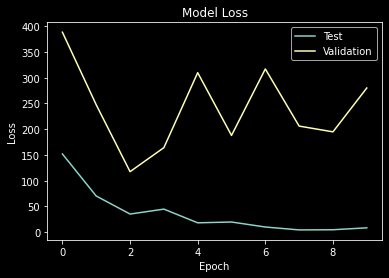

In [ ]:
## loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

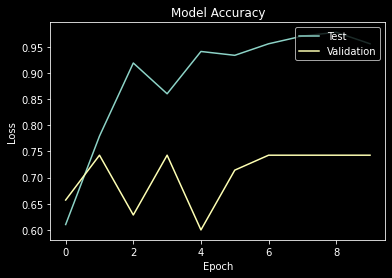

In [ ]:
## Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
## save model
model.save('model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp model.h5 /content/drive/MyDrive/